In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

In [2]:
data = pd.read_csv('./data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        1801 non-null   int64  
 1   date         1801 non-null   object 
 2   ranknow      1801 non-null   int64  
 3   open         1801 non-null   float64
 4   high         1801 non-null   float64
 5   low          1801 non-null   float64
 6   close        1801 non-null   float64
 7   volume       1801 non-null   float64
 8   market       1801 non-null   float64
 9   close_ratio  1801 non-null   float64
 10  spread       1801 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 154.9+ KB


In [3]:
data

,index,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,21628,2013-12-15,24,0.08385,0.13560,0.04350,0.04470,0.0,1.940697e+06,0.012987,0.0
1,21629,2013-12-16,24,0.04485,0.12990,0.02250,0.03075,0.0,1.493994e+06,0.076723,0.0
2,21630,2013-12-17,24,0.03105,0.04335,0.01740,0.04035,0.0,2.147991e+06,0.883516,0.0
3,21631,2013-12-18,24,0.04005,0.05430,0.03075,0.05430,0.0,3.157054e+06,0.999000,0.0
4,21632,2013-12-19,24,0.05925,0.22800,0.04920,0.17430,0.0,1.103884e+07,0.699000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1796,23424,2018-11-15,24,0.40545,0.42240,0.37665,0.42000,22548834.0,3.243695e+08,0.946553,0.0
1797,23425,2018-11-16,24,0.42045,0.42285,0.40005,0.41190,24511311.0,3.181121e+08,0.519180,0.0
1798,23426,2018-11-17,24,0.41190,0.41565,0.38445,0.38925,18347967.0,3.006529e+08,0.153646,0.0
1799,23427,2018-11-18,24,0.38955,0.39675,0.38625,0.39645,11440836.0,3.062762e+08,0.970429,0.0


In [4]:
import warnings                
warnings.filterwarnings("ignore")

In [5]:
data['date'] = data['date'].apply(pd.to_datetime)
data.head()

,index,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,21628,2013-12-15,24,0.08385,0.13560,0.04350,0.04470,0.0,1940697.00,0.012987,0.0
1,21629,2013-12-16,24,0.04485,0.12990,0.02250,0.03075,0.0,1493994.15,0.076723,0.0
2,21630,2013-12-17,24,0.03105,0.04335,0.01740,0.04035,0.0,2147991.12,0.883516,0.0
3,21631,2013-12-18,24,0.04005,0.05430,0.03075,0.05430,0.0,3157053.57,0.999000,0.0
4,21632,2013-12-19,24,0.05925,0.22800,0.04920,0.17430,0.0,11038835.61,0.699000,0.0


In [7]:
NumCols = data.columns.drop(['date'])
data[NumCols] = data[NumCols].replace({',': ''}, regex=True)
data[NumCols] = data[NumCols].astype('float64')
data

,index,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,21628.0,2013-12-15,24.0,0.08385,0.13560,0.04350,0.04470,0.0,1.940697e+06,0.012987,0.0
1,21629.0,2013-12-16,24.0,0.04485,0.12990,0.02250,0.03075,0.0,1.493994e+06,0.076723,0.0
2,21630.0,2013-12-17,24.0,0.03105,0.04335,0.01740,0.04035,0.0,2.147991e+06,0.883516,0.0
3,21631.0,2013-12-18,24.0,0.04005,0.05430,0.03075,0.05430,0.0,3.157054e+06,0.999000,0.0
4,21632.0,2013-12-19,24.0,0.05925,0.22800,0.04920,0.17430,0.0,1.103884e+07,0.699000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1796,23424.0,2018-11-15,24.0,0.40545,0.42240,0.37665,0.42000,22548834.0,3.243695e+08,0.946553,0.0
1797,23425.0,2018-11-16,24.0,0.42045,0.42285,0.40005,0.41190,24511311.0,3.181121e+08,0.519180,0.0
1798,23426.0,2018-11-17,24.0,0.41190,0.41565,0.38445,0.38925,18347967.0,3.006529e+08,0.153646,0.0
1799,23427.0,2018-11-18,24.0,0.38955,0.39675,0.38625,0.39645,11440836.0,3.062762e+08,0.970429,0.0


In [16]:
scaler = MinMaxScaler()
scaler.fit(data['close'].values.reshape(-1,1))

MinMaxScaler()

In [18]:
train_data = data['close'][:-100]
train_data = scaler.transform(train_data.values.reshape(-1,1))
train_data

array([[0.01241103],
       [0.00694077],
       [0.01070525],
       ...,
       [0.14516793],
       [0.13558026],
       [0.1362861 ]])

In [20]:
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

test_data = data['close'][-100-60:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [21]:
X_test = []
y_test = []

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (1641, 60, 1)
y_train Shape:  (1641, 1)
X_test Shape:   (100, 60, 1)
y_test Shape:   (100, 1)


In [ ]:
def define_model():
    #  функция для создания LSTM модели
    input1 = Input(shape=(60,1))
    x = LSTM(units = 64, return_sequences=True)(input1)  
    x = Dropout(0.2)(x)
    x = LSTM(units = 64, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64)(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()
    
    return model

In [27]:
model = define_model()
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=1)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,057 (332.25 KB)

 Trainable params: 85,057 (332.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0086 - val_loss: 0.0199
Epoch 2/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0028 - val_loss: 0.0065
Epoch 3/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0013 - val_loss: 0.0487
Epoch 4/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0035 - val_loss: 0.0040
Epoch 5/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0014 - val_loss: 0.0042
Epoch 6/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0011 - val_loss: 0.0044
Epoch 7/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0011 - val_loss: 0.0042
Epoch 8/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 9.3482e-04 - val_loss: 0.0047
Epoch 9/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 8.6489e-04 - val_loss: 0.0030
Epoch 10/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 8.1436e-04 - val_loss: 0.0051
Epoch 11/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 7.1466e-04 - val_loss: 0.0045
Epoch 12/150
47/47 ━━━━━━━━━━━━━━━━━

In [28]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test) 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0248 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [32]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE

In [33]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.026478147134184837
Test MAPE: 0.350672465915156
Test Accuracy: 0.649327534084844


In [29]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

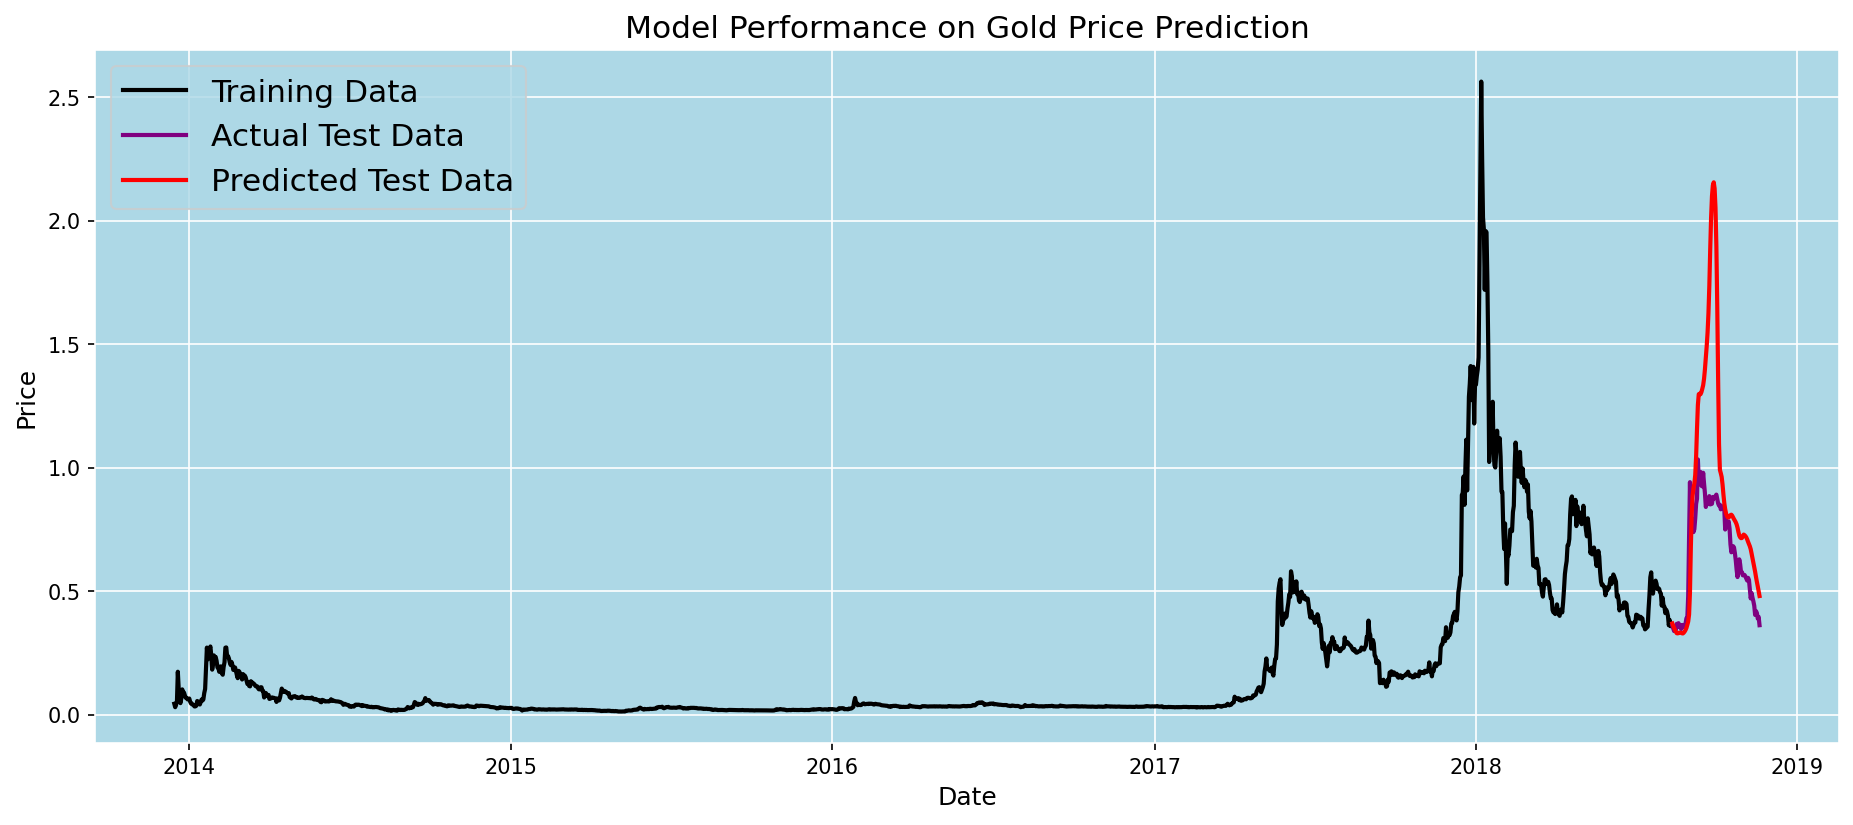

In [31]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'lightblue'
plt.rc('axes',edgecolor='white')
plt.plot(data['date'].iloc[:-100], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(data['date'].iloc[-100:], y_test_true, color='purple', lw=2)
plt.plot(data['date'].iloc[-100:], y_test_pred, color='red', lw=2)
plt.title('Model Performance on Gold Price Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

Как видно на графике и по точности временной ряд здесь работет не очень коректно, но для предсказания следущих данных лучше использовать именно временные ряды так как они если мы посмотрим в перспективе их предсказания верны. Например видно что когд был рост то и модель предсказывала рост так же и с подением. 